# Case 1. Heart Disease Classification
**Neural Networks for Machine Learning Applications**<br>
04.02.2023<br>
### Amal Kayed
### Julian Marco Soliveres
### Mateusz Czarnecki
[Information Technology, Bachelor's Degree](https://www.metropolia.fi/en/academics/bachelors-degrees/information-technology)<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

The main objectives of the following notebook is to use neural networks to make an **expert system** to support diagnostic desicion making. We are going to deepen our deep learning knowledge by testing different model architectures, using visualiations tools and metrics. 

Our task is to firstly read and preprocess the **Heart Disease Health Indicators Dataset** and create a neural network to predict the presence of heart disease among the patients given in the dataset. 

## 2. Setup

We need several python libraries to make the goal of this assignment possible. 

The **pandas** and **numpy** libraries allow us to create and operate on DataFrames, read the data from .csv file and perform operations on arrays such as concatinating. 

The **imblearn** library will become useful when resampling (balancing) the data.

The sklearn library is going to help us with **normalizing** the data.

We need the **matplotlib** and **seaborn** libraries to visualize the number of specific values in the dataset.

The **tensorflow** library is going to help us when building the Machine Learning Model.

**time** is the library we're going to need in order to measure the network training proccess time.

In [61]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

import time

## 3. Dataset

The dataset consists of **253,680** survey responses collected from The Behavioral Risk Factor Surveillance System 2015. The primary purpose of the dataset is to be used for binary classification of a heart disease. **229,787 of the respondents never had a heart** disease, while **23,893 have or had a heart disease**.

A detailed description of the dataset can be found at: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset

In [62]:
df = pd.read_csv("../input/heart-disease-health-indicators-dataset/heart_disease_health_indicators_BRFSS2015.csv")
df.sample(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
64615,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,3.0,0.0,2.0,0.0,0.0,2.0,6.0,4.0
223109,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,6.0,7.0
194039,0.0,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,29.0,14.0,0.0,0.0,5.0,6.0,7.0
136243,0.0,0.0,1.0,1.0,30.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0
252273,0.0,0.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,3.0
120288,0.0,1.0,1.0,1.0,34.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,10.0,4.0,1.0
119665,0.0,1.0,0.0,1.0,27.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,1.0,1.0,10.0,4.0,6.0
155771,0.0,1.0,1.0,1.0,31.0,1.0,0.0,2.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,5.0,8.0
179788,0.0,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,4.0,0.0,0.0,1.0,8.0,6.0,8.0
237300,0.0,1.0,1.0,1.0,26.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,3.0,1.0


In [63]:
df.shape

(253680, 22)

## 4. Preprocessing

At start, let's check if there are any missing values and if our dataset needs a class balance.

In [64]:
df.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Let's start the dataset preprocessing by changing all the values from float to integer values. We don't need the float type because all the numbers are in fact integers.

In [65]:
df = df.astype(int)

In [66]:
df.dtypes

HeartDiseaseorAttack    int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
Diabetes                int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

The next thing we are going to do is split the dataframe columns into features (inputs) and labels (outputs). 

We can also see a big **disproportion** between the disease cases and healthy cases. 

During our project work, we learned that instead of resampling all the features and labels, it's better to resample only the data used for training and not for validation and test purposes. Therefore, we're going to resample our training data later.

In [67]:
# Split column to Features and Target(Y)
features = df.drop(columns='HeartDiseaseorAttack')
labels = df['HeartDiseaseorAttack']

print(f'Disease cases: {sum(labels == 0)}')
print(f'Healthy cases: {sum(labels > 0)}')

Disease cases: 229787
Healthy cases: 23893


After seperating the features and labels, let's study the dataset in more details.

We can see that there are no null values in the dataset.

In [68]:
features.isnull().sum()

HighBP               0
HighChol             0
CholCheck            0
BMI                  0
Smoker               0
Stroke               0
Diabetes             0
PhysActivity         0
Fruits               0
Veggies              0
HvyAlcoholConsump    0
AnyHealthcare        0
NoDocbcCost          0
GenHlth              0
MentHlth             0
PhysHlth             0
DiffWalk             0
Sex                  0
Age                  0
Education            0
Income               0
dtype: int64

Let's have a brief overview on the dataset's statistics. We are going to present the number of records of each category on the graphs in order to clearly see, which values are caterogical, numerical and binary.

In [69]:
features.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [70]:
features.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

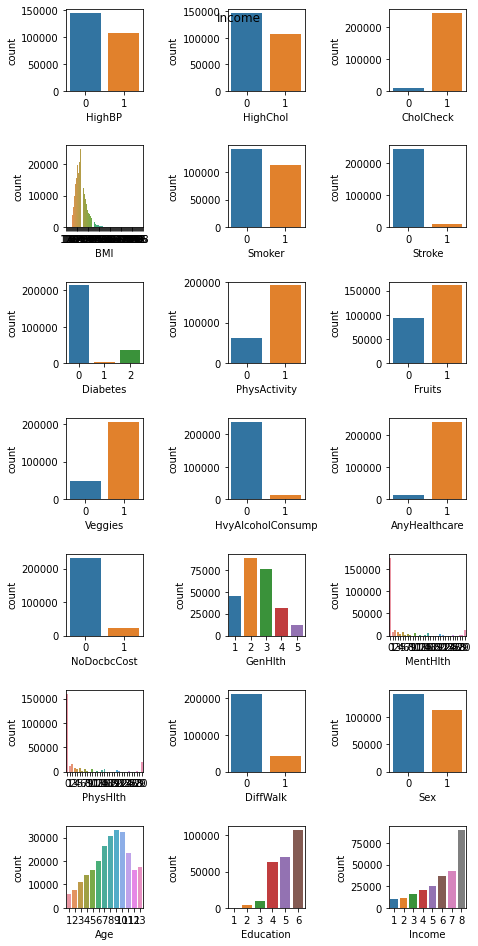

In [71]:
catcol = ['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']

plt.figure(figsize=(7,40))
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 3, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=features, x=column)
    plt.suptitle(f"{column}")
    plt.tight_layout(pad=2)

Thanks to the statistics, we can clearly divide the features into three sets:
* binary features having values 0 or 1
* numerical features having a range of values
* categorical features having numerical categorical values

In [72]:
bin_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
               'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

num_features = ['BMI','MentHlth', 'PhysHlth']

cat_features = ['Diabetes', 'GenHlth', 'Age', 'Education', 'Income']

All the binary features can be easily merged together

In [73]:
bin_values = features[bin_features].values
bin_values

array([[1, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0]])

For the numerical values, we will use **RobustScaler()** function from the preprocessing library, which normalizes the numerical values and makes them easier to analyze by our future model.

In [74]:
transformer = preprocessing.RobustScaler().fit(features[num_features])
num_values = transformer.transform(features[num_features])

num_values

array([[ 1.85714286,  9.        ,  5.        ],
       [-0.28571429,  0.        ,  0.        ],
       [ 0.14285714, 15.        , 10.        ],
       ...,
       [ 0.14285714,  0.        ,  0.        ],
       [-0.57142857,  0.        ,  0.        ],
       [-0.28571429,  0.        ,  0.        ]])

For the categorical values, we will use a **OneHotEncoder()** function from the preprocessing library, which changes their numerical values into arrays representing a given category.

In [75]:
encoder = preprocessing.OneHotEncoder().fit(features[cat_features])
cat_values = encoder.transform(features[cat_features]).toarray()

cat_values

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

After normalizing our data, we can **concatenate** all the features together into one DataFrame.

In [76]:
all_values = np.concatenate((bin_values, num_values, cat_values), axis = 1)
features = pd.DataFrame(all_values)

Here is how our features look like after normalizing the data:

In [77]:
features

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
253676,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
253677,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
253678,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The next step of the data preprocessing is to divide the features and labels into and testing sets. (80%/20%)

In [78]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=48)

To make our **training** data more suitable to create an accurate neural network, we are going to make the amount of disease cases and healthy cases equal using **RandomOverSampler()** function from imblearn library.

In [79]:
train_data,train_labels = RandomOverSampler(random_state=44).fit_resample(train_data,train_labels)

print('Resampled training data')
print(f'Disease cases: {sum(train_labels == 0)}')
print(f'Healthy cases: {sum(train_labels > 0)}')

Resampled training data
Disease cases: 183830
Healthy cases: 183830


Now, we are going to separate the training and validation sets (80%/20%)

In [80]:
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, stratify=train_labels, random_state=48)

After using the **train_test_split()** function two times, according to the 80/20 rule and **resampling our training data**, we receive the data split into training, validation and testing sets. As a result we get the following proportions:

In [81]:
train_data = train_data.to_numpy()
train_labels = train_labels.to_numpy()

val_data = val_data.to_numpy()
val_labels = val_labels.to_numpy()

test_data = test_data.to_numpy()
test_labels = test_labels.to_numpy()

# Counting the data %
sum_length = len(train_data) + len(val_data) + len(test_data)
train_percent =  len(train_data) / sum_length * 100
val_percent = len(val_data) / sum_length * 100
test_percent = len(test_data) / sum_length * 100

print('train data %:\t',train_percent)
print('val data %:\t', val_percent)
print('test data %:\t', test_percent)

train data %:	 70.29895123280338
val data %:	 17.574737808200844
test data %:	 12.126310958995784


## 5. Modeling

During the project work, we considered different neural network models that could be applied for our problem. Adding extra layers did not result in getting a higher accuracy, so finally we decided on a simple model consisting of one hidden layer with the input shape of 51. Because we are dealing with a binary classification proble, we decided on the **rmsprop** optimizer and on **binary_crossentropy** loss function. The metrics taken into consideration are **Accuracy**, **Recall (sensitivity)** and **TrueNegatives** with **FalsePositives** in order to get the best possible **specificity**.

We print the shapes of our train and test sets, in order to decide on a number of inputs for our model.

In [82]:
print(train_data.shape, train_data.dtype)
print(train_labels.shape, train_labels.dtype)
print(val_data.shape, val_data.dtype)
print(val_labels.shape, val_labels.dtype)

(294128, 51) float64
(294128,) int64
(73532, 51) float64
(73532,) int64


We create our model using **Sequential** constructor, adding Dense layers and specyfing their activation functions. We decided on using the reliable **ReLU** and **sigmoid** activation functions.

We can see the model summary showing that the model consists of 260 parameters in the first layer and 6 parameters in the second layer.

In [83]:
model = models.Sequential()
model.add(layers.Dense(5, activation='relu', input_shape=(51,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 260       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


Then, we compile the model using the **compile()** method and specyfing the parameters described before.

In [84]:
model.compile(
                optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['Accuracy','Recall','TrueNegatives', 'FalsePositives']
             )

## 6. Training

Initially we tried to train our network with a small batch_size (16). However, we quickly realized that the training process was taking a lot of time (training on 10 epochs took around 1 minute time). In order to be able to use higher amount of epochs, we set the batch_size to a bigger numer. We discovered that the higher the batch_size is, the faster the training process gets.<br>

After the batch_size correction, we tried training our model using various numbers of epochs. At a certain point (around 150 epochs), adding more epochs does not increase the accuracy of the model. Therefore, we decided to stick to 50 epochs. This number of epochs makes our model not overfitted and not overcomplicated.

After training the model, we print out the final test and validation accuracy, recall and specificity values.

In [85]:
t0 = time.time()
hist = model.fit(train_data, train_labels, epochs=150, batch_size=8200,
                 validation_data = (val_data, val_labels),verbose=0)

print(f'Training time: {time.time()-t0} seconds')

print('\nAccuracy:',hist.history['Accuracy'][-1])
print('Recall:',hist.history['recall'][-1])
print('Specificity', hist.history['true_negatives'][-1] / (hist.history['false_positives'][-1] + hist.history['true_negatives'][-1]))

print('\nVal Accuracy:',hist.history['val_Accuracy'][-1])
print('Val Recall:',hist.history['val_recall'][-1])
print('Val Specificity', hist.history['val_true_negatives'][-1] / (hist.history['val_false_positives'][-1] + hist.history['val_true_negatives'][-1]))


Training time: 35.21842098236084 seconds

Accuracy: 0.7760635018348694
Recall: 0.8270344734191895
Specificity 0.7250924767448186

Val Accuracy: 0.7723439931869507
Val Recall: 0.8191807866096497
Val Specificity 0.7255072621443726


## 7. Performance and evaluation

In this section, we are going to present the performance of our neural network model.

The first graph presents the **loss value** changing over the amount of epochs for both training and validation sets. As, we can see, the accuracy of validation and training sets are very similar, which indicates that our model is not overfitted.

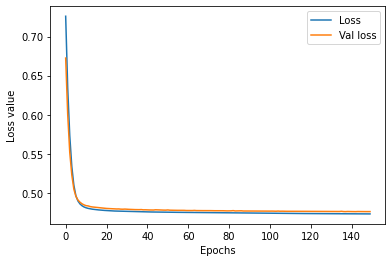

In [86]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.legend()
plt.show()

The next plot presents the accuracy change for both training and validation sets. Here, we can also see that both sets results are very close to each other.

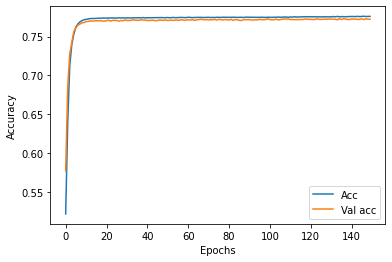

In [87]:
plt.plot(hist.history['Accuracy'], label='Acc')
plt.plot(hist.history['val_Accuracy'], label='Val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The next two graphs present the sensitivity and specificity of our model for both training and validation sets, changing over the number of epochs. The specificity is calculated based on the following pattern: 
- **TN / (FP + TN)**

where: 
- **TN** equals the number of True Negatives
- **TP** represents the number of False Positives

(0.0, 1.0)

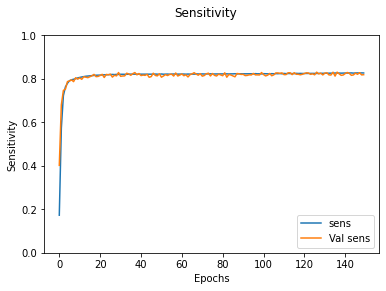

In [88]:
sensitivity = hist.history['recall']
val_sensitivity = hist.history['val_recall']

false_positives = hist.history['false_positives']
val_false_positives = hist.history['val_false_positives']

true_negatives = hist.history['true_negatives']
val_true_negatives = hist.history['val_true_negatives']

specificity = []
val_specificity = []

for i in range(0, len(false_positives)):
    specificity.append(true_negatives[i] / (false_positives[i] + true_negatives[i]))
    
for i in range(0, len(val_false_positives)):
    val_specificity.append(val_true_negatives[i] / (val_false_positives[i] + val_true_negatives[i]))


plt.plot(sensitivity, label='sens')
plt.plot(val_sensitivity, label='Val sens')
plt.legend()
plt.suptitle('Sensitivity')
plt.xlabel('Epochs')
plt.ylabel('Sensitivity')
plt.ylim([0, 1])

(0.0, 1.0)

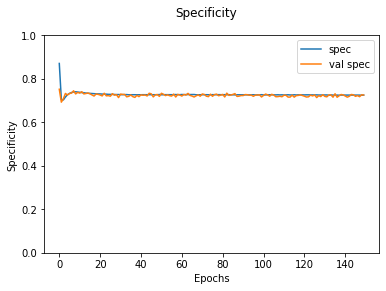

In [89]:
plt.plot(specificity, label='spec')
plt.plot(val_specificity, label='val spec')
plt.legend()
plt.suptitle('Specificity')
plt.xlabel('Epochs')
plt.ylabel('Specificity')
plt.ylim([0, 1])

To sum up and show our model performance with not resampled, real world data, here are all the final performance indicators of our selected neural network model for the **test set**.

We are going to evaluate our model and print out all the performance indicators taken into consideration when creating a model.

In [90]:
results = model.evaluate(test_data, test_labels)

print()
print('----------------------------------')
print('Summary performance indicators:')
print('----------------------------------')
print('\nLoss function: ', results[0])
print('Accuracy: ', results[1])
print('Sensitivity: ', results[2])
true_negatives = results[3]
false_positives = results[4]
print('Specificty: ', true_negatives / (true_negatives + false_positives))


1586/1586 [==============================] - 2s 1ms/step - loss: 0.4844 - Accuracy: 0.7361 - recall: 0.8123 - true_negatives: 33467.0000 - false_positives: 12490.0000

----------------------------------
Summary performance indicators:
----------------------------------

Loss function:  0.4844181537628174
Accuracy:  0.736143946647644
Sensitivity:  0.8123038411140442
Specificty:  0.7282242095872229


## 8. Discussion and conclusions

During the work process, we tested various numbers of layers and units. However, then because they didn't change the accuracy of the model, we decided on creating a simple network containing **one hidden layer** with **5 units**. As mentioned before, we discovered different batch sizes and batch numbers, which were crucial aspects when looking for overfitting and model training time. Finally, we ended up with a model consisting of **150 epochs** and **8200 batch size**.

The final achieved performance of the model was **0,73 accuracy**, **0,49 loss value**, 0,82 sensitivity and **0,72** specificity. We are satisfied with the final result. 

During the project, we learned how to fully preprocess the data in a real-world example such as Heart Disease Classification problem. We have a clear undestanding of the importance and ways to encode and resample the data in order to build a reliable neural network model. We learned how to adjust the model parameters in order to get satysfying results, improve the performance of the model and prevent overfitting.